# Classification
model ML yang digunakan untuk memprediksi data tipe kategorikal

misalnya, dari cholesterol seseorang (fitur chol) apakah dia sakit jantung/ tidak (1 atau 0, positif/negatif, sakit/ sehat)

model yang bisa memprediksi data tipe discrete. categorical.


## Logistic Regression
salah satu dari banyak algoritma ML untuk model tipe Classification

menggunakan teknik membuat formula matematik yang menghubungkan fitur dan target, sama seperti regression. tapi formula nya berbeda, kita gunakan sigmoid function, garisnya berbentuk S. Nanti secara otomatis, kalau nilai dari garis regression ini diatas 0.5, hasil prediksi masuk ke kategori 1. kalau dibawah, hasil prediksi masuk ke kategori 0.

untuk model yang memprediksi antara lebih dari 2 kategori, dan lebih dari 1 fitur, algoritmat Logistic Regression masih bisa digunakan.



In [ ]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import matplotlib.pyplot as plt

In [ ]:
# contoh: data diabetes
df_dia = pd.read_csv("https://raw.githubusercontent.com/stefkwan-h8/dataset/main/diabetes.csv")
df_dia.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# tidak ada missing values
df_dia.isnull().sum().sum()

0

In [ ]:
# tipe data sudah numerik semua
df_dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


disini kita bisa membuat model ML tipe classification yang memprediksi apakah seseorang punya penyakit diabetes (outcome 1) atau tidak (outcome 0)

kita bisa gunakan satu fitur (glucose) tingkat gula darah, atau lebih dari satu fitur (glucose, bloodpressure, bmi, age, ...)

untuk sekarang kita coba dengan 1 fitur glucose, buat model ML, Logistic Regression, memprediksi Outcome (1/0)

In [ ]:
# 1. persiapan data - data sudah di import

# 2. data cleaning dan exploration - tipe data sudah benar, tidak ada missing value
# kita siapkan fitur dan target

# fitur
X = df_dia[['Glucose']]

# target
Y = df_dia['Outcome']

In [ ]:
# 3. membuat model tipe Logistic Regression
model_LR = LogisticRegression()
model_LR.fit(X, Y)

LogisticRegression()

model sudah jadi, kita bisa pakai. kita gunakan untuk menebak apakah seseorang punya sakit diabetes atau tidak dari fitur - fitur kita kali ini adalah Glucose, atau tingkat gula darah seseorang

In [ ]:
# apakah seseorang yang gula darah 200 punya sakit diabetes?
model_LR.predict([[200]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

model memprediksi 1, iya, Outcome 1, orang memiliki diabetes

In [ ]:
# sebenarnya hasil logistic regression bukan 1 0 tapi sebuah angka continuous
# kita bisa lihat pakai predict_proba
model_LR.predict_proba([[200]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.09757222, 0.90242778]])

model ini bilang kemungkinan masuk kategori 0, Outcome 0, tidak diabetes, adalah 0.0976 atau 9.76%

model ini bilang kemungkinan masuk kategori 1, Outcome 1, diabetes, adalah 0.9024 atau 90.24%

dari hasil logistic regression yang continuous ini, model secara otomatis memilih yang persentase tertinggi, dan memberi hasil "predict" ke kategori tersebut. total predict_proba selalu 1 atau 100%

In [ ]:
# 4. evaluasi model
# cara evaluasi model tipe Classification sedikit lebih rumit, kita gunakan 2 hal berbeda

1. Confusion Matrix
2. Classification Report

## Confusion Matrix
sebuah matrix

sebuah set angka 2 dimensi, banyangkan numpy array 2 dimensi, ada baris ada kolom

setiap baris adalah kategori yang mau ditebak, data asli

setiap kolom adalah hasil tebakan dari model, data hasil prediksi



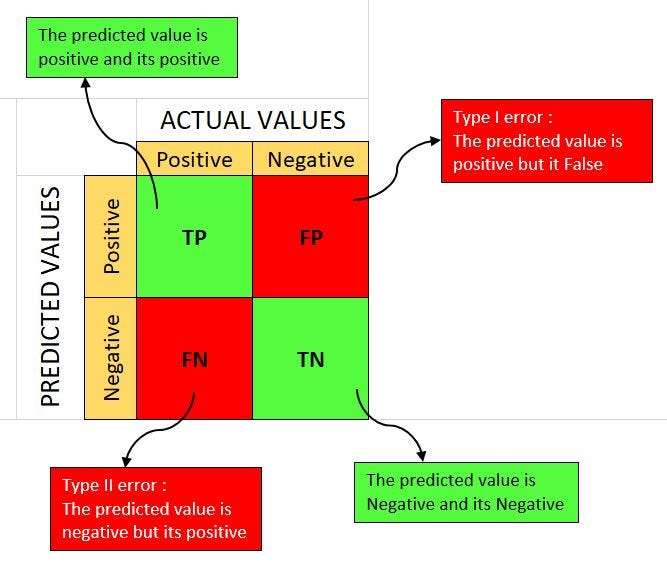

confusion matrix memperlihatkan, dari data yang kita prediksi, berapa banyak yang benar, berapa banyak yang salah. kalau salah, dia salah tebak ke kategori yang mana.

gambar diatas adalah confusion matrix untuk 2 kategori. 0 negative, 1 positive.

kalau kita menebak 10 kali, dan dari 10 data ini aslinya ada 6 positive dan 4 negative. maka kolom positive total 6, kolom negative total 4.

kalau dari 6 data positive kita, ada 2 yang berhasil ditebak dengan benar. kita bilangnya TP True Positive ada 2.

In [ ]:
# masi kita coba buat confusion matrix untuk model LR diabetes yang barusan kita buat
# bandingkan data asli Y outcome diabetes/tidak dengan hasil prediksi model kita
confusion_matrix(Y, model_LR.predict(X))

array([[443,  57],
       [138, 130]])

baris pertama confusion matrix untuk kategori 0:

- ada 443 orang yang beneran sehat yang kita prediksi dengan benar, mereka sehat, aslinya 0, prediksi juga 0

- ada 57 orang yang salah prediksi, aslinya 0, prediksi 1

baris kedua confusion matrix untuk kategori 1:

- ada 138 orang yang di prediksi 0, padahal aslinya 1, aslinya sakit diabetes kita prediksi sehat

- ada 130 orang yang di prediksi 1, dan benar aslinya 1, aslinya sakit diabetes, kita prediksi sakit diabetes

jadi totalnya ada 443 + 130 yang berhasil di prediksi dengan benar

ada 57 + 138 yang salah prediksi


In [ ]:
# biasanya untuk mempermudah baca confusion matrix, kita buatkan grafik visual dengan warna dan label

def BuatConfusionMatrix(target_asli, hasil_prediksi, jumlah_kategori=2, judul_grafik="", label=False):
  if (label == False): label = range(jumlah_kategori)
  cm = confusion_matrix(target_asli, hasil_prediksi)

  fig, ax = plt.subplots(figsize=(jumlah_kategori+1, jumlah_kategori+1))
  ax.imshow(cm)
  ax.grid(False)
  ax.xaxis.set(ticks=range(jumlah_kategori), ticklabels=label)
  ax.yaxis.set(ticks=range(jumlah_kategori), ticklabels=label)
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Actual")
  ax.set_ylim(jumlah_kategori-0.5, -0.5)
  for i in range(jumlah_kategori):
      for j in range(jumlah_kategori):
          ax.text(j, i, cm[i, j], ha='center', va='center', color='black')

  plt.title(judul_grafik)
  plt.show()

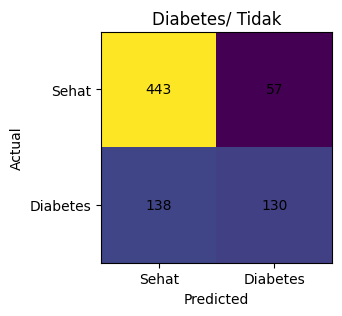

In [ ]:
BuatConfusionMatrix(Y, model_LR.predict(X), 2, "Diabetes/ Tidak", ["Sehat", "Diabetes"])

selain confusion matrix, kita gunakan juga classification report

kita bisa dapat "skor" untuk overall angka akurasi model kita, tidak harus dilihat per kategori tertentu

In [ ]:
classification_report(Y, model_LR.predict(X))

'              precision    recall  f1-score   support\n\n           0       0.76      0.89      0.82       500\n           1       0.70      0.49      0.57       268\n\n    accuracy                           0.75       768\n   macro avg       0.73      0.69      0.70       768\nweighted avg       0.74      0.75      0.73       768\n'

hasil report di print biar rapi

In [ ]:
report = classification_report(Y, model_LR.predict(X))

print(report)

              precision    recall  f1-score   support

           0       0.76      0.89      0.82       500
           1       0.70      0.49      0.57       268

    accuracy                           0.75       768
   macro avg       0.73      0.69      0.70       768
weighted avg       0.74      0.75      0.73       768



sekian untuk contoh pembuatan model Logistic Regression

model kita bisa menebak seseorang sakit diabetes (1) atau tidak (0) jika diberikan 1 angka Glucose, tingkat gula darah.

akurasinya di 0.75

untuk kategori diabetes (1) skor recall rendah di 0.49 jadi dari sekian banyak orang diabetes (1) yang di prediksi diabetes (1) oleh model kita hanya sekitar setengahnya saja

# (KNN) K-Nearest Neighbor
dimana K adalah angka integer 1,2,3,...

Nearest Neighbor artinya tetangga terdekat

jadi kita bisa bayangkan algoritma KNN ini mencari tetangga terdekat sebanyak K.

misalkan K = 3

kita punya titik data dengan 2 fitur: Umur dan Glucose. kalau titik data C dengan Umur 50 dan Glucose 101 kita plot ke grafik 2 dimensi, kita cari 3 tetangg terdekat dia, siapa aja, masuk kategori mana? kalau 2 dari 3 tetangga masuk kategori sehat, maka C juga masuk kategori sehat

In [ ]:
# kita coba buat model KNN dengan dataset diabetes yang sama, menggunakan fitur Glucose dan Age
df_dia.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# siapkan fitur dan target
X = df_dia[['Glucose', 'Age']]
Y = df_dia['Outcome']

In [ ]:
# buat model
model_KNN = KNeighborsClassifier() # n_neighbors default 5
model_KNN.fit(X, Y)

KNeighborsClassifier()

In [ ]:
# bisa pakai model untuk buat prediksi
# contoh umur 50, glucose 101, diabetes(1) atau tidak (0)

model_KNN.predict([[101, 50]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

model kita prediksi orang umur 50 dengan glucose 101, sehat outcome (0)

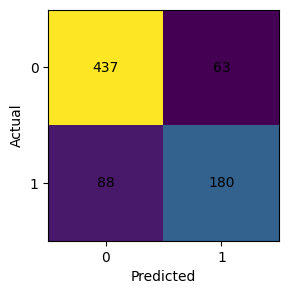

In [ ]:
# evaluasi
# confusion matrix
BuatConfusionMatrix(Y, model_KNN.predict(X))

In [ ]:
# classification report
print(classification_report(Y, model_KNN.predict(X)))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       500
           1       0.74      0.67      0.70       268

    accuracy                           0.80       768
   macro avg       0.79      0.77      0.78       768
weighted avg       0.80      0.80      0.80       768



In [ ]:
accuracy_score(Y, model_KNN.predict(X))

0.8033854166666666

In [ ]:
# untuk model KNN tuning parameter yang mudah adalah mengubah jumlah k, jumlah neighbors yang digunakan
# kita cobain bikin model KNN untuk setiap jumlah neighbors berbeda sambil mencari akurasi tertinggi/ error terendah

skor = []
jumlah_k = range(1, 41)

for k in jumlah_k:
  model_KNN = KNeighborsClassifier(n_neighbors = k)
  model_KNN.fit(X, Y)

  skor.append(accuracy_score(Y, model_KNN.predict(X)))

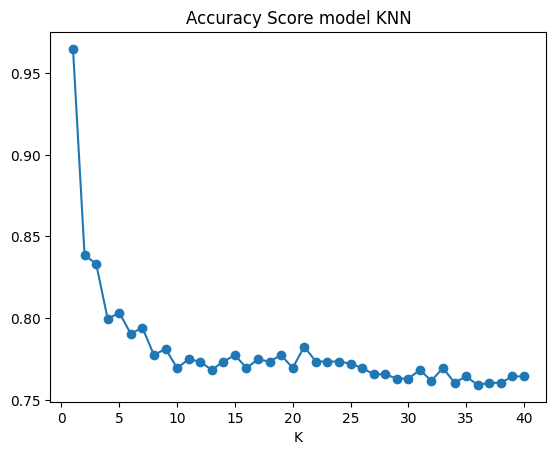

In [ ]:
plt.plot(jumlah_k, skor, marker="o")
plt.title("Accuracy Score model KNN")
plt.xlabel("K")
plt.show()

# Mencoba Dataset sama dengan dua model berbeda
kita akan gunakan dataset untuk mengklasifikasi lebih dari 2 kategori

kita akan gunakan lebih dari 1 fitur

kita akan bandingkan hasil model LR dan KNN, untuk dibahas mana yang lebih cocok untuk dataset ini

In [ ]:
# import data
# delimiter bisa kita edit, kalau pemisah kolom di file csv bukan ","
df_customer = pd.read_csv("https://raw.githubusercontent.com/stefkwan-h8/dataset/main/marketing_campaign.csv", sep="\t")
df_customer.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df_customer.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
# remove missing values
df_customer2 = df_customer.dropna()

In [ ]:
df_customer2['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [ ]:
# kita remove Alone Absurd dan YOLO karena datanya sedikit
df_customer2 = df_customer2[df_customer2['Marital_Status'] != 'Alone']
df_customer2 = df_customer2[df_customer2['Marital_Status'] != 'Absurd']
df_customer2 = df_customer2[df_customer2['Marital_Status'] != 'YOLO']

In [ ]:
df_customer2['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Name: Marital_Status, dtype: int64

In [ ]:
# extra, encoding
# untuk data tipe non numerik, kita convert jadi numerik pakai teknik encoding

# pisah fitur dan target
X = df_customer2[['Income', 'MntWines']]
Y = df_customer2['Marital_Status']

# encoding untuk Y
le = LabelEncoder()
le.fit(Y)

Y_encoded = le.transform(Y)
print(le.classes_)

['Divorced' 'Married' 'Single' 'Together' 'Widow']


ternyata targetnya ada 5 jenis

In [ ]:
# buat model LR
model_LR2 = LogisticRegression(solver='liblinear')
model_LR2.fit(X, Y)

LogisticRegression(solver='liblinear')

In [ ]:
# buat model KNN
model_KNN2 = KNeighborsClassifier()
model_KNN2.fit(X, Y)

KNeighborsClassifier()

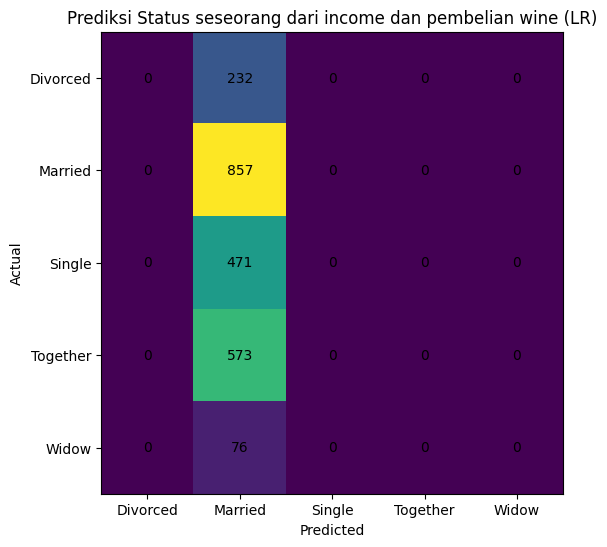

In [ ]:
# bandingin confusion matrix
BuatConfusionMatrix(Y,
                    model_LR2.predict(X),
                    5,
                    "Prediksi Status seseorang dari income dan pembelian wine (LR)",
                     ['Divorced', 'Married', 'Single', 'Together', 'Widow']
                    )

model LR kita sama sekali tidak bisa memprediksi status tidak Married. semua di masukin ke Married.

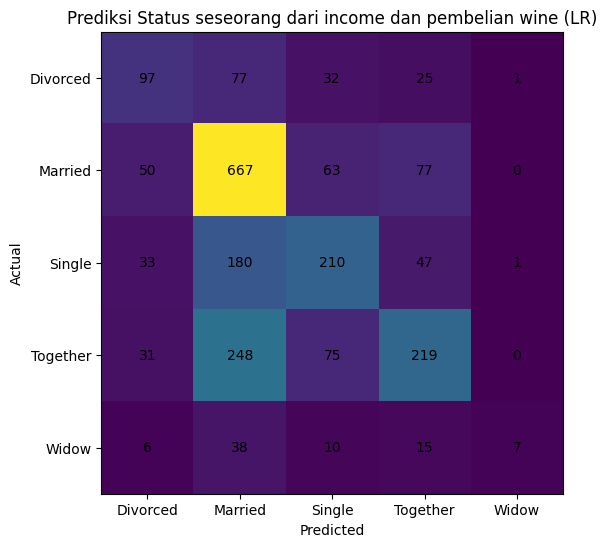

In [ ]:
BuatConfusionMatrix(Y,
                    model_KNN2.predict(X),
                    5,
                    "Prediksi Status seseorang dari income dan pembelian wine (LR)",
                     ['Divorced', 'Married', 'Single', 'Together', 'Widow']
                    )

In [ ]:
# classification report
print(classification_report(Y, model_LR2.predict(X)))

              precision    recall  f1-score   support

    Divorced       0.00      0.00      0.00       232
     Married       0.39      1.00      0.56       857
      Single       0.00      0.00      0.00       471
    Together       0.00      0.00      0.00       573
       Widow       0.00      0.00      0.00        76

    accuracy                           0.39      2209
   macro avg       0.08      0.20      0.11      2209
weighted avg       0.15      0.39      0.22      2209



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(classification_report(Y, model_KNN2.predict(X)))

              precision    recall  f1-score   support

    Divorced       0.45      0.42      0.43       232
     Married       0.55      0.78      0.65       857
      Single       0.54      0.45      0.49       471
    Together       0.57      0.38      0.46       573
       Widow       0.78      0.09      0.16        76

    accuracy                           0.54      2209
   macro avg       0.58      0.42      0.44      2209
weighted avg       0.55      0.54      0.52      2209



kedua algoritma ini kurang cocok untuk prediksi status marital seseorang dari income dan pengeluaran wine nya.

bisa juga karena fitur income dan pengeluaran wine memang tidak memprediksi status marital dengan baik.

banyak juga teknik data preprocessing lainnya untuk mempersiapkan data sebelum kita buat model ML, misalnya data cleaning, mengurangi outlier, mengurangi jumlah kategori, mengecek dan menghapus invalid values, splitting data jadi test dan train data, encoding (sudah dicoba), scaling/ normalizing, dan lainnya.


# Summary
1. Konsep ML Model Classification yang tujuannya untuk memprediksi kategori
2. mencoba 2 algoritme ML Classification berbeda, Logistic Regression dan K Nearest Neighbors
3. belajar cara evaluasi model Classification yang baik/ buruk menggunakan Confusion Matrix dan Classification Report
4. bahas teknik teknik preprocess data yang diperlukan untuk membuat model yang lebih baik. salah satunya encoding.

- data cleaning, missing values, invalid values, tipe data yang tepat
- split data train dan test data
- encoding
- mengurangi jumlah kategori (cardinality)
- mengurangi outlier
- scaling/ normalizing

In [ ]:
# Naive Bayes
model_NB = GaussianNB()
model_NB.fit(X, Y)

GaussianNB()

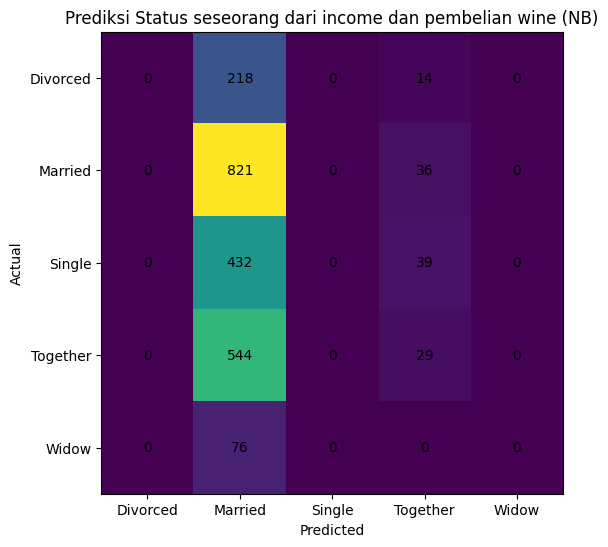

In [ ]:
BuatConfusionMatrix(Y,
                    model_NB.predict(X),
                    5,
                    "Prediksi Status seseorang dari income dan pembelian wine (NB)",
                     ['Divorced', 'Married', 'Single', 'Together', 'Widow']
                    )

In [ ]:
print(classification_report(Y, model_NB.predict(X)))

              precision    recall  f1-score   support

    Divorced       0.00      0.00      0.00       232
     Married       0.39      0.96      0.56       857
      Single       0.00      0.00      0.00       471
    Together       0.25      0.05      0.08       573
       Widow       0.00      0.00      0.00        76

    accuracy                           0.38      2209
   macro avg       0.13      0.20      0.13      2209
weighted avg       0.22      0.38      0.24      2209



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


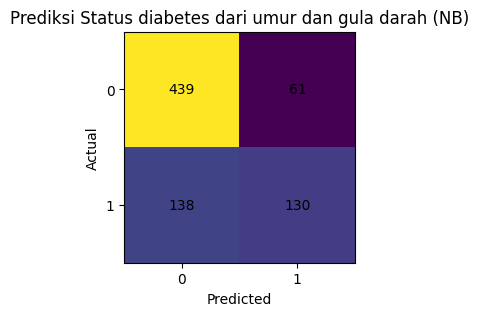

              precision    recall  f1-score   support

           0       0.76      0.88      0.82       500
           1       0.68      0.49      0.57       268

    accuracy                           0.74       768
   macro avg       0.72      0.68      0.69       768
weighted avg       0.73      0.74      0.73       768



In [ ]:
# kita coba untuk dataset diabetes tadi
# siapkan fitur dan target
X = df_dia[['Glucose', 'Age']]
Y = df_dia['Outcome']

# buat model
model_NB_dia = GaussianNB()
model_NB_dia.fit(X, Y)

# evaluasi model
BuatConfusionMatrix(Y,
                    model_NB_dia.predict(X),
                    2,
                    "Prediksi Status diabetes dari umur dan gula darah (NB)",
                    )

print(classification_report(Y, model_NB_dia.predict(X)))

kalau kita bandingkan hasil prediksi untuk kategori 1, diabetes, dia sama buruknya dengan model ti